<a href="https://colab.research.google.com/github/SoniaVG/Analysis-of-data/blob/main/PCA_y__Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d camnugent/california-housing-prices
!unzip /content/california-housing-prices.zip
import pandas as pd
datos=pd.read_csv('/content/housing.csv')

Saving kaggle.json to kaggle.json
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 58.8MB/s]
Archive:  /content/california-housing-prices.zip
  inflating: housing.csv             


In [20]:


y=datos[datos.median_house_value<500000].median_house_value
X=datos[datos.median_house_value<500000].drop(['median_house_value'], axis=1)
X.head(2)
 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY


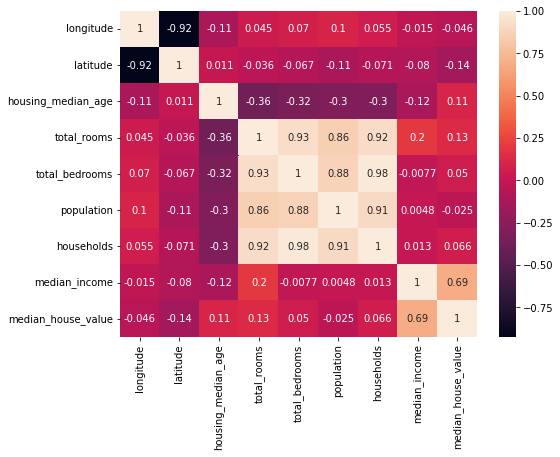

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = datos.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [40]:
X_train=X_train.fillna(X_train.mean())
X_test=X_test.fillna(X_test.mean())
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4481,-118.18,34.06,27.0,2025.0,565.0,2189.0,577.0,2.6083,<1H OCEAN
158,-122.23,37.81,52.0,2814.0,365.0,878.0,352.0,7.5080,NEAR BAY
9454,-123.23,39.77,25.0,2075.0,435.0,991.0,377.0,1.2281,INLAND
9883,-121.80,36.72,14.0,2493.0,407.0,1296.0,418.0,5.4508,<1H OCEAN
7705,-118.13,33.96,35.0,1500.0,250.0,706.0,250.0,4.5625,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9711,-121.66,36.67,40.0,2497.0,520.0,1275.0,508.0,3.1071,<1H OCEAN
13724,-117.19,34.06,37.0,1467.0,348.0,1316.0,339.0,1.4480,INLAND
10342,-117.69,33.80,5.0,3178.0,631.0,1467.0,581.0,5.2541,<1H OCEAN
11382,-117.95,33.67,25.0,1611.0,383.0,554.0,327.0,3.0417,<1H OCEAN


In [42]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test= X_test.copy()

feature_categorical=['ocean_proximity']
# Apply ordinal encoder to each column with categorical data

label_X_train['ocean_proximity'] = labelencoder.fit_transform(X_train[feature_categorical])
label_X_test['ocean_proximity'] =labelencoder.transform(X_test[feature_categorical])

label_X_train.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4481,-118.18,34.06,27.0,2025.0,565.0,2189.0,577.0,2.6083,0
158,-122.23,37.81,52.0,2814.0,365.0,878.0,352.0,7.5080,3
9454,-123.23,39.77,25.0,2075.0,435.0,991.0,377.0,1.2281,1


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE 
import numpy as np

#Regresión lineal
modelo_lineal = LinearRegression(normalize=True)
modelo_lineal.fit(X =label_X_train, y = y_train)
prediccion= modelo_lineal.predict(X=label_X_test)

#metricas 
print("R^2 in train:",modelo_lineal.score(label_X_train,y_train))
print("R^2 in test:",modelo_lineal.score(label_X_test,y_test))
error_absoluto_medio = metrics.mean_absolute_error(y_test, prediccion)
error_cuadratico_medio= metrics.mean_squared_error(y_test,prediccion)
print('error_absoluto_medio:',error_absoluto_medio)
print('error_cuadratico_medio: ',error_cuadratico_medio)
print('raís de error cuadratico: ',np.sqrt(MSE(y_test,prediccion)))



R^2 in train: 0.6034461520649069
R^2 in test: 0.5988695636910505
error_absoluto_medio: 46167.250912032694
error_cuadratico_medio:  3858677802.2675505
raís de error cuadratico:  62118.25659391569


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [44]:
#Estandarizar las variables , aplicar pca y realizar regresión lineal

modelado = make_pipeline(StandardScaler(), PCA(n_components=6), LinearRegression(normalize=True)) 
modelado.fit(X=label_X_train, y=y_train)
predicciones = modelado.predict(X=label_X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


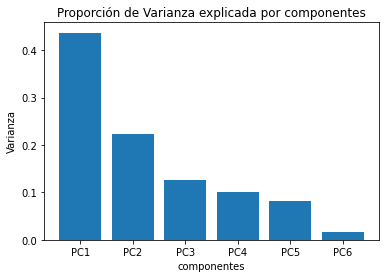

In [45]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

eje_x =['PC1','PC2','PC3','PC4','PC5','PC6']#,'PC7','PC8','PC9']
## Declaramos valores para el eje y
eje_y =modelado.named_steps['pca'].explained_variance_ratio_
 
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Legenda en el eje y
plt.ylabel('Varianza')
 
## Legenda en el eje x
plt.xlabel('componentes')
 
## Título de Gráfica
plt.title('Proporción de Varianza explicada por componentes')
 
## Mostramos Gráfica
plt.show()

In [46]:
print(' R^2 train: ',modelado.score(label_X_train,y_train))
print('R^2 test:',modelado.score(label_X_test,y_test))

#Métricas
error_absoluto_medio = metrics.mean_absolute_error(y_test, predicciones)
error_cuadratico_medio= metrics.mean_squared_error(y_test,predicciones)
print('error_absoluto_medio:',error_absoluto_medio)
print('error_cuadratico_medio: ',error_cuadratico_medio)
print('raís de error cuadratico: ',np.sqrt(MSE(y_test,predicciones)))


 R^2 train:  0.4867983408986255
R^2 test: 0.48366446854260625
error_absoluto_medio: 53523.08591330339
error_cuadratico_medio:  4966894240.411476
raís de error cuadratico:  70476.19626804128


En este caso, se implemento PCA para mitigar los efectos de la correlación en el conjunto de datos originales, sin embargo, como puede verse, considerar las primeras 6 componente, no fue garantía para lograr un modelo con mayor capacidad predictiva que el modelo de regresión lineal. 